# Problem Set 

"For the things we have to learn before we can do them, we learn by doing them." - Aristotle

There's nothing quite like working with a new tool to really understand it, so we have put together some exercises through this book to give you a chance to put into practice what you learned in the previous lesson(s). 

In [1]:
import mxnet as mx
import numpy as np
%matplotlib notebook
from matplotlib import pyplot as plt
from mxnet import nd, autograd
mx.random.seed(1)

## Problems using NDarray [(Official Documentation)](https://mxnet.incubator.apache.org/api/python/ndarray.html) 


Problem 1: Initialize an ndarray of dimension 1x256 on the GPU without overwriting its memory. Then, find the index corresponding to the maximum value in the array (argmax)

In [2]:
# Problem 1 Work Area
tst = nd.empty(shape=(1,256), ctx=mx.cpu(0))
#tst = nd.empty(shape=(1,2), ctx=mx.gpu(0)) # Conda MXNet package not compiled with CUDA enabled...
print(tst.argmax(axis=1))
print(tst.max())
print(tst.pick(tst.argmax(axis=1), axis=1))
print(tst)


[ 115.]
<NDArray 1 @cpu(0)>

[  7.67262114e+34]
<NDArray 1 @cpu(0)>

[  7.67262114e+34]
<NDArray 1 @cpu(0)>

[[  0.00000000e+00   0.00000000e+00   1.16274108e+27   1.80641863e+28
   -1.55130242e-38   4.58154533e-41   7.58758692e+31   2.01961523e-19
    2.03656675e-19   1.84928761e+20   1.15760550e+27   1.69302008e+22
    4.15758807e+21   7.50203970e+28   1.93488984e-19   1.84964789e+20
    1.05822206e+21   1.06460080e+24   1.35678778e-19   1.10455709e-32
    1.35631564e-19   1.74431231e+28   4.46528448e+30   7.38056534e+34
    1.95185260e-19   1.81755759e+31   2.76847053e+20   6.85889756e+22
    1.86723697e+25   7.39822918e+20   7.14631414e+22   4.74289253e+30
    5.08303064e+31   4.61142286e+24   1.16716987e-32   1.35631564e-19
    1.10242232e+24   1.09011883e+27   1.09026456e+27   2.06164699e-19
    1.85257174e+28   1.87681970e+25   2.82311061e+23   1.75636984e+25
    2.91720319e+32   1.84654652e+25   8.39856551e-33   2.79466547e+20
    1.85223834e+28   7.38916850e+20   1.13839450e-

## Problems from Linear Algebra

Problem 2: Create a 4x4 matrix of random values (where values are uniformly random on the iterval [0,1]. Then create an 4x4 identity matrix (an identity of size n is the n × n square matrix with ones on the main diagonal and zeros elsewhere). Multiply the two together and verify that you get the original matrix back.

In [3]:
# Problem 2 Work Area
rnd = nd.uniform(0,1,(4,4))
print(rnd)
idmat = nd.zeros((4,4))
for i in range(4):
    idmat[i,i] = 1
print(idmat)


[[ 0.52383333  0.05501367  0.03996297  0.59453225]
 [ 0.18596531  0.69035321  0.77279067  0.98788726]
 [ 0.55214888  0.01780298  0.0862769   0.37452859]
 [ 0.44139475  0.4481566   0.71554917  0.38271946]]
<NDArray 4x4 @cpu(0)>

[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]
<NDArray 4x4 @cpu(0)>


In [4]:
out = nd.dot(rnd, idmat)
print(out)
print(rnd)
(imax, jmax) = rnd.shape
# Assert element-wise match
for i in range(imax):
    for j in range(jmax):
        assert rnd[i,j]==out[i,j]


[[ 0.52383333  0.05501367  0.03996297  0.59453225]
 [ 0.18596531  0.69035321  0.77279067  0.98788726]
 [ 0.55214888  0.01780298  0.0862769   0.37452859]
 [ 0.44139475  0.4481566   0.71554917  0.38271946]]
<NDArray 4x4 @cpu(0)>

[[ 0.52383333  0.05501367  0.03996297  0.59453225]
 [ 0.18596531  0.69035321  0.77279067  0.98788726]
 [ 0.55214888  0.01780298  0.0862769   0.37452859]
 [ 0.44139475  0.4481566   0.71554917  0.38271946]]
<NDArray 4x4 @cpu(0)>


In [5]:
# Let's multiply by some non-identity matrices for fun
testmat = nd.zeros((4,4))
for i in range(4):
    testmat[0,i] = 1
print(testmat)
print(testmat.T)


[[ 1.  1.  1.  1.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]
<NDArray 4x4 @cpu(0)>

[[ 1.  0.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 1.  0.  0.  0.]]
<NDArray 4x4 @cpu(0)>


In [6]:
# These should help refresh how matrix mult. works, if needed
print(nd.dot(rnd, testmat))
print(nd.dot(rnd, testmat.T))
print(nd.dot(testmat, rnd))
print(nd.dot(testmat.T, rnd))


[[ 0.52383333  0.52383333  0.52383333  0.52383333]
 [ 0.18596531  0.18596531  0.18596531  0.18596531]
 [ 0.55214888  0.55214888  0.55214888  0.55214888]
 [ 0.44139475  0.44139475  0.44139475  0.44139475]]
<NDArray 4x4 @cpu(0)>

[[ 1.21334219  0.          0.          0.        ]
 [ 2.63699651  0.          0.          0.        ]
 [ 1.03075731  0.          0.          0.        ]
 [ 1.98781991  0.          0.          0.        ]]
<NDArray 4x4 @cpu(0)>

[[ 1.7033422   1.21132636  1.6145798   2.33966756]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]
<NDArray 4x4 @cpu(0)>

[[ 0.52383333  0.05501367  0.03996297  0.59453225]
 [ 0.52383333  0.05501367  0.03996297  0.59453225]
 [ 0.52383333  0.05501367  0.03996297  0.59453225]
 [ 0.52383333  0.05501367  0.03996297  0.59453225]]
<NDArray 4x4 @cpu(0)>


In [7]:
rnd2 = nd.uniform(0,1,(3,5))
rnd2


[[ 0.67055315  0.69996703  0.47284564  0.63394254  0.90616089]
 [ 0.76160562  0.10491847  0.05266096  0.17473155  0.28631815]
 [ 0.08891999  0.39664856  0.64965612  0.04412551  0.07138746]]
<NDArray 3x5 @cpu(0)>

In [8]:
test2 = nd.zeros((3,5))
for i in range(5):
    test2[0,i] = 1
print(test2)
print(test2.T)


[[ 1.  1.  1.  1.  1.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]
<NDArray 3x5 @cpu(0)>

[[ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]]
<NDArray 5x3 @cpu(0)>


In [9]:
# We know how to work with non-square matrices, right?
print(nd.dot(rnd2, test2.T))
print(nd.dot(test2.T, rnd2))
print(nd.dot(test2, rnd2.T))
print(nd.dot(rnd2.T, test2))


[[ 3.3834691   0.          0.        ]
 [ 1.38023484  0.          0.        ]
 [ 1.25073755  0.          0.        ]]
<NDArray 3x3 @cpu(0)>

[[ 0.67055315  0.69996703  0.47284564  0.63394254  0.90616089]
 [ 0.67055315  0.69996703  0.47284564  0.63394254  0.90616089]
 [ 0.67055315  0.69996703  0.47284564  0.63394254  0.90616089]
 [ 0.67055315  0.69996703  0.47284564  0.63394254  0.90616089]
 [ 0.67055315  0.69996703  0.47284564  0.63394254  0.90616089]]
<NDArray 5x5 @cpu(0)>

[[ 3.3834691   1.38023484  1.25073755]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]]
<NDArray 3x3 @cpu(0)>

[[ 0.67055315  0.67055315  0.67055315  0.67055315  0.67055315]
 [ 0.69996703  0.69996703  0.69996703  0.69996703  0.69996703]
 [ 0.47284564  0.47284564  0.47284564  0.47284564  0.47284564]
 [ 0.63394254  0.63394254  0.63394254  0.63394254  0.63394254]
 [ 0.90616089  0.90616089  0.90616089  0.90616089  0.90616089]]
<NDArray 5x5 @cpu(0)>


Problem 3: Create a 3x3x20 tensor such that at every x,y coordinate, moving through the z coordinate lists the [Fibonacci sequence](https://en.wikipedia.org/wiki/Fibonacci_number). So, at a z position of 0, the 3x3 matrix will be all 1s. At z-position 1, the 3x3 matrix will be all 1s. At z-position 2, the 3x3 matrix will be all 2s, at z-position 3, the 3x3 matrix will be all 3s and so forth.

Hint: Create the first 2 matrices by hand and then use element-wise operations in a loop to construct the rest of the tensor. 

In [10]:
# Problem 3 Work Area
T = nd.zeros(shape=(3,3,20))
f1 = nd.ones(shape=(3,3))

In [11]:
T[:,:,0] = f1
T[:,:,1] = f1

In [12]:
for z in range(2,20):
    T[:,:,z] = T[:,:,z-1] + T[:,:,z-2]

In [13]:
T


[[[  1.00000000e+00   1.00000000e+00   2.00000000e+00   3.00000000e+00
     5.00000000e+00   8.00000000e+00   1.30000000e+01   2.10000000e+01
     3.40000000e+01   5.50000000e+01   8.90000000e+01   1.44000000e+02
     2.33000000e+02   3.77000000e+02   6.10000000e+02   9.87000000e+02
     1.59700000e+03   2.58400000e+03   4.18100000e+03   6.76500000e+03]
  [  1.00000000e+00   1.00000000e+00   2.00000000e+00   3.00000000e+00
     5.00000000e+00   8.00000000e+00   1.30000000e+01   2.10000000e+01
     3.40000000e+01   5.50000000e+01   8.90000000e+01   1.44000000e+02
     2.33000000e+02   3.77000000e+02   6.10000000e+02   9.87000000e+02
     1.59700000e+03   2.58400000e+03   4.18100000e+03   6.76500000e+03]
  [  1.00000000e+00   1.00000000e+00   2.00000000e+00   3.00000000e+00
     5.00000000e+00   8.00000000e+00   1.30000000e+01   2.10000000e+01
     3.40000000e+01   5.50000000e+01   8.90000000e+01   1.44000000e+02
     2.33000000e+02   3.77000000e+02   6.10000000e+02   9.87000000e+02
   

In [14]:
T[:,:,5]


[[ 8.  8.  8.]
 [ 8.  8.  8.]
 [ 8.  8.  8.]]
<NDArray 3x3 @cpu(0)>

Problem 4: What is the sum of the vector you created? What is the mean?

In [15]:
# Problem 4 Work Area
nd.sum(T)


[ 159390.]
<NDArray 1 @cpu(0)>

In [16]:
nd.mean(T)


[ 885.5]
<NDArray 1 @cpu(0)>

Problem 5: Create a vector [0,1], and another vector [1,0], and use mxnet to calculate the angle between them. Remember that the dot product of two vectors is equal to the cossine of the angle between the vectors, and that the arccos function is the inverse of cosine.

In [17]:
# Problem 5 Work Area
import numpy as np
x1 = nd.array([1,0])
x2 = nd.array([0,1])
n1 = nd.norm(x1)
n2 = x2.norm()
# x1 \dot x2 = ||x1|| * ||x2|| * cos(\theta)
# ==> \theta = arccos( ( x1 \dot x2) / ( ||x1|| * ||x2||) )
angle = nd.arccos(nd.dot(x1, x2) / n1 / n2)
print("angle is:", angle.asscalar(), "radians")
print("Differs from pi/2 by:")
print(angle.asscalar() - np.pi/2)

angle is: 1.5708 radians
Differs from pi/2 by:
4.37113900631e-08


## Problems from Probability

Problem 6: In the classic game of Risk, the attacker can roll a maximum of three dice, while the defender can roll a maximum of two dice. Simulate the attacking and defending dice using `sample_multinomial` to try to estimate the odds that an attacker will win against a defender when both are rolling the maximum number of dice.

In [18]:
# Problem 6 Work Area
probs = nd.ones(6) / 6.

In [19]:
%%time
ntrials = 100;
defense = nd.zeros(ntrials)
offense = nd.zeros(ntrials)
winner = nd.zeros(ntrials)

rolls = nd.sample_multinomial(probs, shape=(ntrials,5))

def_wins = 0
for idx, row in enumerate(rolls):
    deff = int(nd.sum(row[:2]).asscalar()) + 2
    off = int(nd.sum(row[2:]).asscalar()) + 3
    defense[idx] = deff
    offense[idx] = off
    if deff >= off:
        def_wins += 1
        winner[idx] = 1
win_prob = def_wins / ntrials
print("%.8f" % win_prob)

0.29000000
CPU times: user 45.6 ms, sys: 5.83 ms, total: 51.4 ms
Wall time: 44 ms


In [20]:
print(defense) # What did defender roll each time?
print(offense) # What did attacker roll?
print(winner) # Use a 1 to mark all the rolls the defender won (assuming tie goes to defender)


[  5.  10.   4.   8.  11.   3.   2.   4.   4.   3.   3.  11.  10.   6.   6.
   4.   8.  12.   6.  11.   4.   5.  11.   5.   8.   4.   7.   5.   9.   9.
   7.   3.  11.   9.   6.  11.   6.  10.   6.   8.  10.   5.  11.   8.   7.
  10.  10.   9.   5.   7.   9.   2.   7.   4.  12.   7.  12.   5.   9.   8.
   3.   5.  12.   4.  11.   7.   9.   4.   9.   7.   6.   4.   9.   9.   4.
   4.   7.   6.   9.   6.  10.   3.   5.   7.   2.   8.   6.   6.  11.   5.
   6.   8.  11.   6.   7.   7.   5.   5.   3.  11.]
<NDArray 100 @cpu(0)>

[  7.  11.  11.  12.   4.   8.  14.  12.  11.  12.   7.   6.  13.  11.  12.
  10.   7.   9.  17.  10.  10.   9.  10.   8.   9.  10.  11.  10.  11.  14.
  12.   6.   8.  11.   5.   9.  13.  12.   5.   6.   5.  13.   7.  17.   7.
  10.  10.  11.  16.  14.  10.   9.  14.   9.  12.  13.  10.   9.  12.   5.
  13.   9.   6.  12.   8.  10.   8.   9.   8.  12.   7.  10.   8.   6.  13.
  11.   9.   7.   5.   7.  16.  11.  14.   9.  14.  14.   8.  11.  13.   7.
   6.  14.  

In [21]:
%%time
ntrials = 1000;
defense = nd.zeros(ntrials)
offense = nd.zeros(ntrials)
winner = nd.zeros(ntrials)

rolls = nd.sample_multinomial(probs, shape=(ntrials,5))

def_wins = 0
for idx, row in enumerate(rolls):
    deff = int(nd.sum(row[:2]).asscalar()) + 2
    off = int(nd.sum(row[2:]).asscalar()) + 3
    defense[idx] = deff
    offense[idx] = off
    if deff >= off:
        def_wins += 1
        winner[idx] = 1
win_prob = def_wins / ntrials
print("%.8f" % win_prob)

0.23700000
CPU times: user 300 ms, sys: 23.8 ms, total: 324 ms
Wall time: 291 ms


In [22]:
%%time
ntrials = 10000;
defense = nd.zeros(ntrials)
offense = nd.zeros(ntrials)
winner = nd.zeros(ntrials)

rolls = nd.sample_multinomial(probs, shape=(ntrials,5))

def_wins = 0
for idx, row in enumerate(rolls):
    deff = int(nd.sum(row[:2]).asscalar()) + 2
    off = int(nd.sum(row[2:]).asscalar()) + 3
    defense[idx] = deff
    offense[idx] = off
    if deff >= off:
        def_wins += 1
        winner[idx] = 1
win_prob = def_wins / ntrials
print("%.8f" % win_prob)

0.21440000
CPU times: user 3.4 s, sys: 269 ms, total: 3.67 s
Wall time: 3.32 s


In [23]:
%%time
ntrials = 100000;
defense = nd.zeros(ntrials)
offense = nd.zeros(ntrials)
winner = nd.zeros(ntrials)

rolls = nd.sample_multinomial(probs, shape=(ntrials,5))

def_wins = 0
for idx, row in enumerate(rolls):
    deff = int(nd.sum(row[:2]).asscalar()) + 2
    off = int(nd.sum(row[2:]).asscalar()) + 3
    defense[idx] = deff
    offense[idx] = off
    if deff >= off:
        def_wins += 1
        winner[idx] = 1
win_prob = def_wins / ntrials
print("%.8f" % win_prob)

0.22011000
CPU times: user 31 s, sys: 2.48 s, total: 33.5 s
Wall time: 30.7 s


In [24]:
%%time
ntrials = 1000000;
defense = nd.zeros(ntrials)
offense = nd.zeros(ntrials)
winner = nd.zeros(ntrials)

rolls = nd.sample_multinomial(probs, shape=(ntrials,5))

def_wins = 0
for idx, row in enumerate(rolls):
    deff = int(nd.sum(row[:2]).asscalar()) + 2
    off = int(nd.sum(row[2:]).asscalar()) + 3
    defense[idx] = deff
    offense[idx] = off
    if deff >= off:
        def_wins += 1
        winner[idx] = 1
win_prob = def_wins / ntrials
print("%.8f" % win_prob)

0.22173700
CPU times: user 4min 38s, sys: 19.7 s, total: 4min 58s
Wall time: 4min 29s


## Problems from Automatic differentiation with ``autograd`` 

Problem 7: The formula for a parabola is y=ax^2+bx+c. If a=5 and b = 13, what is the slope of y when x=0.  How about when x=7? 

In [25]:
# Problem 7 Work Area
x = nd.array([0, 7.])
x.attach_grad()
with autograd.record():
    y = 5. * x * x + 13. * x + 7.
y.backward()
print("Slope for x=0, 7:", x.grad)

Slope for x=0, 7: 
[ 13.  83.]
<NDArray 2 @cpu(0)>


In [26]:
# Let's get grad at more points
x = nd.array(np.arange(0., 11., 1.))
x.attach_grad()
with autograd.record():
    y = 5. * x * x + 13. * x + 7.
# Correct derivative is obvious, confirm we get
# dy/dx = 10x + 13
print(x)
y.backward()
x.grad


[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]
<NDArray 11 @cpu(0)>



[  13.   23.   33.   43.   53.   63.   73.   83.   93.  103.  113.]
<NDArray 11 @cpu(0)>

Problem 8: Graph the parabola described in Problem 6 and inspect the slope of y when x = 0 and x = 7. Does it match up with your answer from Problem 6?


In [27]:
# Problem 8 Work Area
def parabola(x):
    return 5. * x * x + 13. * x + 7.

In [28]:
# Generic definition for a line.
# To make tangent to our parabola p(x) at point x_0,
# Pass in b = p(x_0)
# and a = p'(x_0) = x.grad for x=x_0
# Since we defined x = [0,1,2,3,...], we have x[i] = i for non-neg. integers
# In other words, x.grad[i] = p'(x_0) for x_0=i
# In general, we'd have to search for the index of x s.t. x[i] = x_0
def tangent_line(x, x_0, a, b):
    return a * (x - x_0) + b

<IPython.core.display.Javascript object>


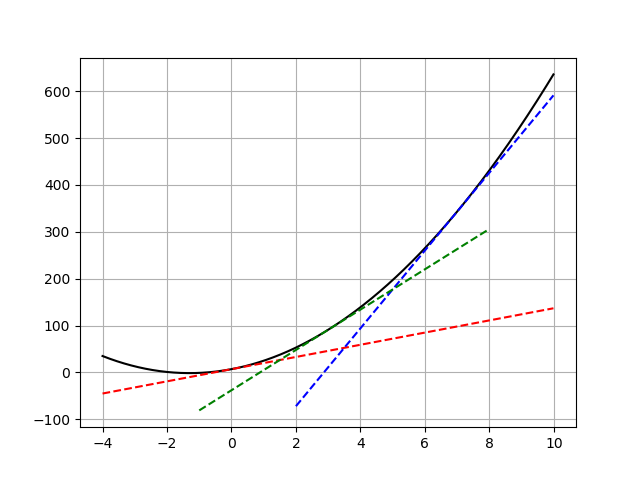

In [29]:
# Plot shows the lines are tangent, therefore the derivatives are correct.
pts = np.arange(-4., 10., 0.01)
pts1 = np.arange(-4., 10., 0.01)
pts2 = np.arange(2., 10., 0.01)
pts3 = np.arange(-1., 8., 0.01)
plt.plot(pts, parabola(pts), 'k-')
plt.plot(pts1, tangent_line(pts1, 0, x.grad[0].asscalar(), parabola(0)), 'r--')
plt.plot(pts2, tangent_line(pts2, 7, x.grad[7].asscalar(), parabola(7)), 'b--')
plt.plot(pts3, tangent_line(pts3, 3, x.grad[3].asscalar(), parabola(3)), 'g--')
plt.grid()
plt.show()

## Next
[Chapter 2: Linear regression from scratch](../chapter02_supervised-learning/linear-regression-scratch.ipynb)

For whinges or inquiries, [open an issue on  GitHub.](https://github.com/zackchase/mxnet-the-straight-dope)